# Testing the nonseparable split operator propagator for the 1D Schrodinger equation

In [1]:
import matplotlib.pyplot as plt # plotting facility
import numpy as np
from nonseparable_split_op_schrodinger1D import NonseparableSplitOpSchrdoniger1D

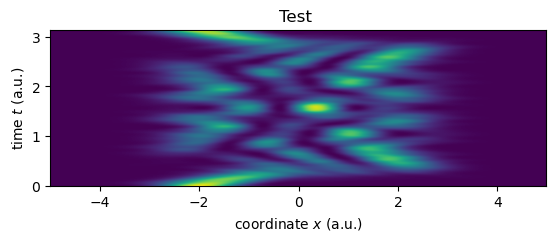

0.0019187614404282405

In [16]:
time_steps = 10000
dt = np.pi / time_steps

kerr_oscilator = NonseparableSplitOpSchrdoniger1D(
    dt = dt,
    
    x_grid_dim = 512,
    x_amplitude = 5.,
    
    k = lambda p: p ** 4 / 4,
    g = lambda x: x ** 4 / 4,
    
    T = lambda p: p ** 2 / 2 / np.sqrt(2),
    V = lambda x: x ** 4  / 12,
)

# set the initial condition
kerr_oscilator.set_wavefunction(
    lambda x: np.exp(-(x + 2.) ** 2)
)


# propagate till time T and for each time step save a probability density
wavefunctions = [kerr_oscilator.wavefunction.copy(), ] +\
    [kerr_oscilator.propagate().copy() for _ in range(time_steps)]

# ge

plt.title(
        "Test "
    )

# plot the time dependent density
plt.imshow(
    np.abs(wavefunctions) ** 2,
    # some plotting parameters
    origin='lower',
    extent=[kerr_oscilator.x.min(), kerr_oscilator.x.max(), 0., time_steps * kerr_oscilator.dt]
)
plt.xlabel('coordinate $x$ (a.u.)')
plt.ylabel('time $t$ (a.u.)')
plt.show()



1 - overlap[-1]

In [51]:
DeltaT = []
fidelity = []

for time_steps in 2 ** np.arange(6, 19):
    
    dt = np.pi / time_steps
    
    DeltaT.append(dt)

    kerr_oscilator = NonseparableSplitOpSchrdoniger1D(
        dt = dt,

        x_grid_dim = 512,
        x_amplitude = 5.,

        k = lambda p: p ** 4 / 4,
        g = lambda x: x ** 4 / 4,

        T = lambda p: p ** 2 / 2 / np.sqrt(2),
        V = lambda x: x ** 4  / 12,
    )

    # set the initial condition
    kerr_oscilator.set_wavefunction(
        lambda x: np.exp(-(x + 2.) ** 2)
    )

    psi0 = kerr_oscilator.wavefunction.copy()
    
    fidelity.append(
        1 - np.abs(
            np.vdot(psi0, kerr_oscilator.propagate(time_steps)) * kerr_oscilator.dx
        )
    )

DeltaT = np.array(DeltaT)

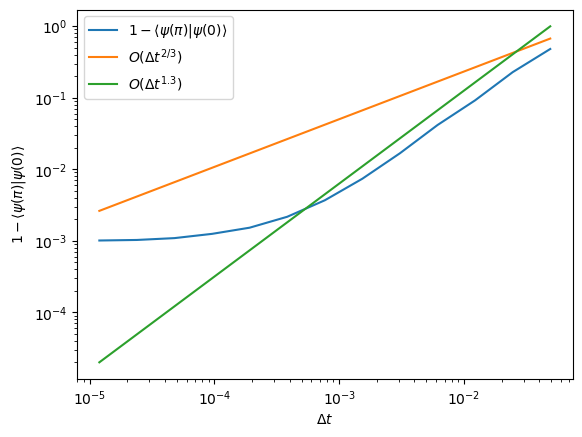

In [52]:

plt.loglog(DeltaT, fidelity, label=r"$1 - \langle \psi(\pi) | \psi(0) \rangle$")
plt.xlabel(r"$\Delta t$")
plt.ylabel(r"$1 - \langle \psi(\pi) | \psi(0) \rangle$")

plt.loglog(DeltaT, 5 *DeltaT ** (2/3), label=r"$O(\Delta t^{2/3})$")
plt.loglog(DeltaT, 50 *DeltaT ** (1.3), label=r"$O(\Delta t^{1.3})$")

plt.legend()
plt.show()

4096